# A3.2: What Gets Counted Counts - Dataset Analysis

## Deliverable
- **One PDF file** containing the results of your analysis.  
- The length may be as long as necessary to adequately communicate your findings.  

---

## Instructions
In this assignment, you will apply your **data analysis** and **visualization** skills to the dataset you previously selected.  
The goal is to enhance your understanding of data science concepts and to develop your ability to **derive insights from data**.

---

## Dataset Review
- Review the dataset selected in the previous assignment.  
- Refresh your memory about its contents, variables, and any relevant background information. 

---

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Load Data
stress_data = pd.read_csv('Stress_Dataset.csv')
stress_data['Which type of stress do you primarily experience?'] = (
    stress_data['Which type of stress do you primarily experience?']
    .str.split('-')
    .str[0]
    .str.strip()
)
stress_data.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress)
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress)
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress)
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress)
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress)



## Data Analysis
1. **Explore Variables and Patterns**  
   - Examine variables, distributions, and relationships.  
   - Use descriptive statistics (mean, median, standard deviation, etc.).  

In [2]:
stress_data.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

2. **Identify Trends and Outliers**  
   - Highlight significant patterns or anomalies.  
   - Look for correlations or dependencies between variables.  

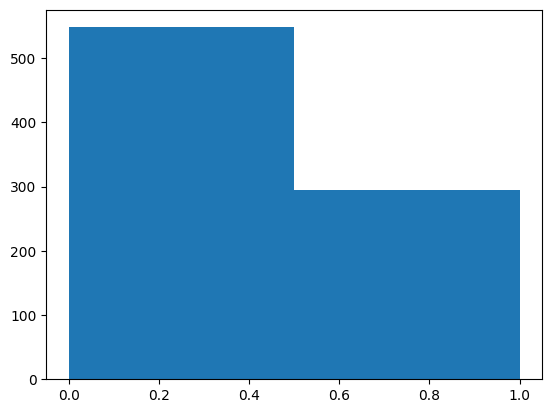

In [4]:
# 0 is male, 1 is female
plt.hist(stress_data['Gender'], bins=2)
plt.show()

In [5]:
# correlation matrix
col = 'Which type of stress do you primarily experience?'
stress_data[col + ' (code)'] = stress_data[col].astype('category').cat.codes

corr_matrix = stress_data.select_dtypes(include='number').corr(method='pearson')
# corr_matrix
# will be turned into a heatmap later way too large/messy to print here

3. **Cross-Tabulation**  
   - Perform cross-tabulation for categorical variables.  
   - Use results to identify meaningful relationships.  

In [6]:
# only categorical vars are gender(coded 0-male, 1-female) and type of stress
ct = pd.crosstab(
        stress_data['Gender'], 
        stress_data['Which type of stress do you primarily experience?'],
        margins=True,
        normalize='index') * 100
ct.round(1)

Which type of stress do you primarily experience?,Distress (Negative Stress),Eustress (Positive Stress),No Stress
Gender,,,
0,3.5,92.3,4.2
1,4.4,88.8,6.8
All,3.8,91.1,5.1


4. **Statistical Testing (if applicable)**  
   - Apply tests such as **chi-square** or **t-tests**.  
   - Discuss both statistical and **practical significance** of findings.  

In [7]:
# chi-squared test for gender and type of stress
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"Chi-square statistic = {chi2:.3f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")     # needs to be less than 0.05 to be significant

Chi-square statistic = 0.828
Degrees of freedom = 4
P-value = 0.9346


In [8]:
# T-test/ANOVA: amount of stress to types of stress
# ANOVA is like t-test but for more than 2 categories which is perfect for the 3 types of
#   stress we have here

stress_amount = 'Have you recently experienced stress in your life?'
stress_type = 'Which type of stress do you primarily experience?'

# Group by stress type and extract each group’s "amount of stress" values
groups = [
    group[stress_amount].values
    for name, group in stress_data.groupby(stress_type)
]

# Perform one-way ANOVA (same logic as t-test but for 3+ groups)
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 23.147
P-value: 0.0000


---
## Visualization Creation
- Develop clear, well-labeled visualizations to present key findings.  
- Choose visualization types that best represent:  
  - Distribution of variables  
  - Relationships and correlations  
  - Cross-tabulation results  
  - Statistically significant findings  
- Ensure clarity with **titles, labels, and legends**.  

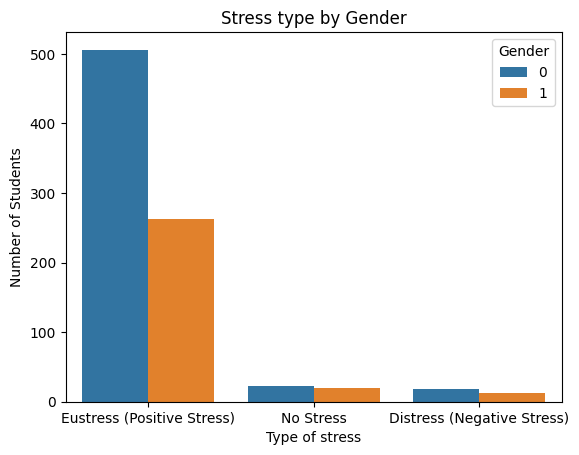

In [9]:
# visualizing the cross-tabulation (gender and stress type)(chi-squared)
sns.countplot(
    data=stress_data, 
    x = 'Which type of stress do you primarily experience?', 
    hue = 'Gender'
)
plt.title('Stress type by Gender')
plt.ylabel('Number of Students')
plt.xlabel('Type of stress')
plt.show()

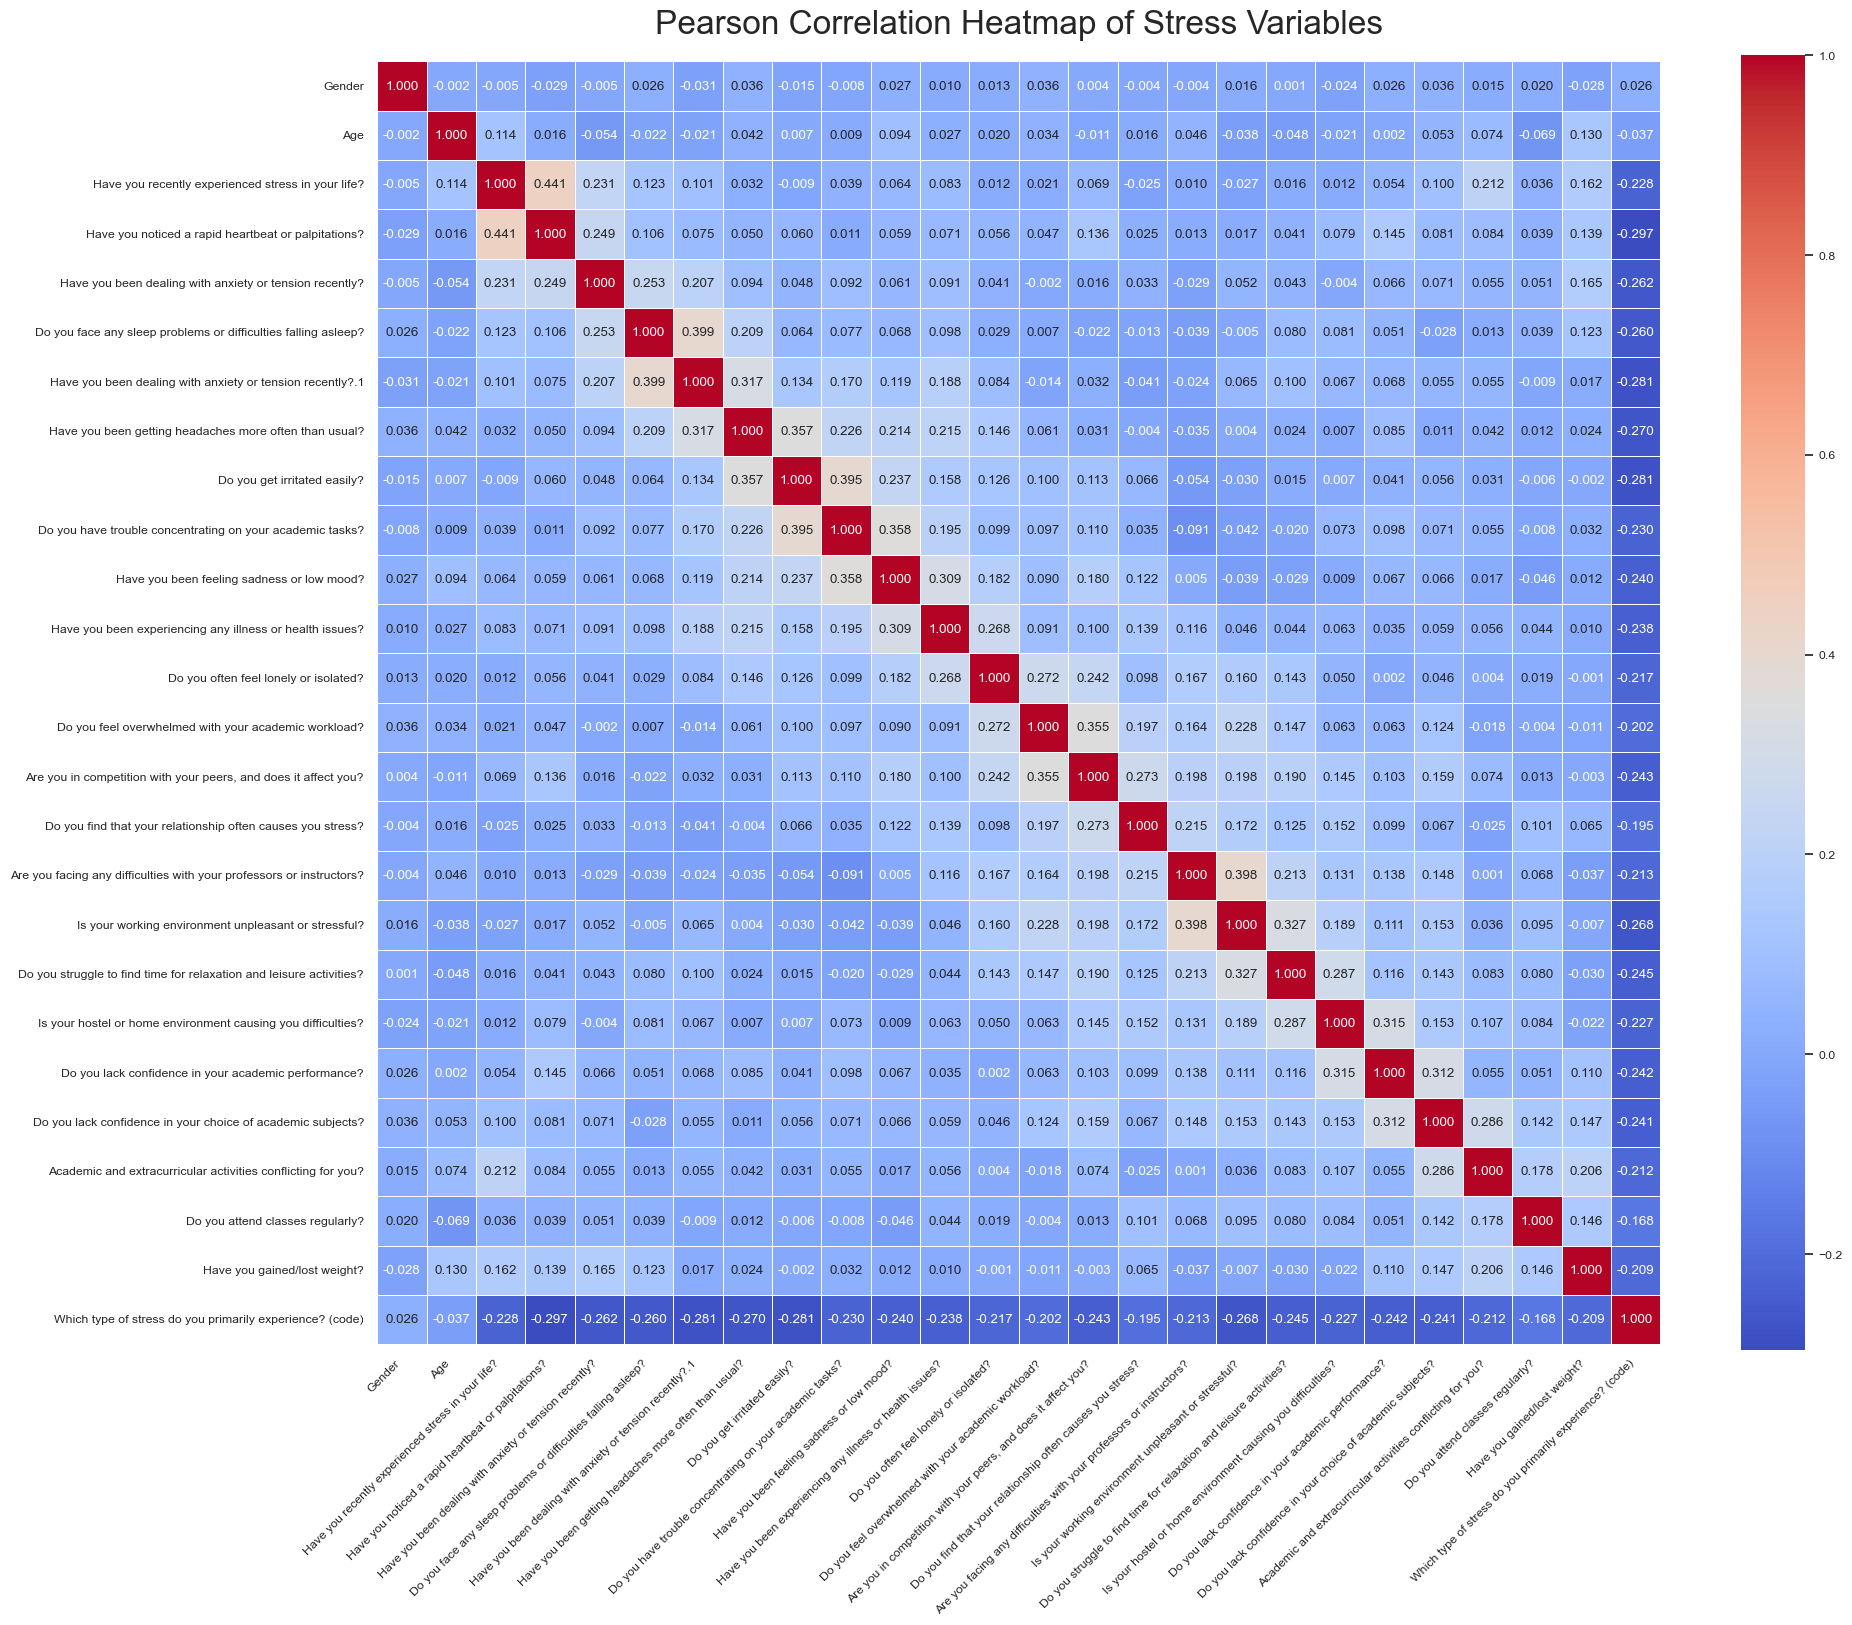

In [10]:
# correlation matrix heatmap
# shows r values between numerical variables (-1 for negative correlations, +1 for positive correlations, and 0 for no correlation)
# does not show p-values
plt.figure(figsize=(20,20))
sns.set(font_scale=0.8)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink':0.7},
    square=True
)

plt.title('Pearson Correlation Heatmap of Stress Variables', fontsize=24, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

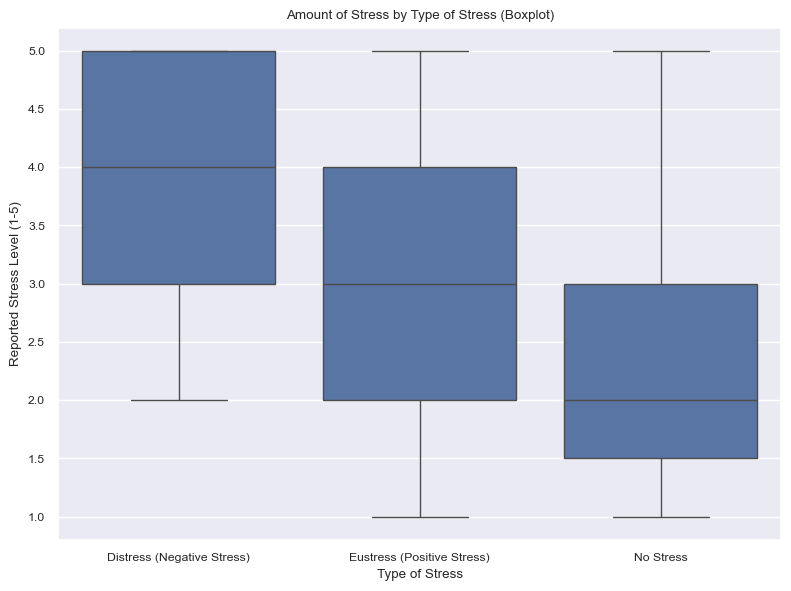

In [11]:
# Boxplot for ANOVA test

order = sorted(stress_data[stress_type].unique())
group_arrays = [stress_data.loc[stress_data[stress_type] == g, stress_amount].values for g in order]

plt.figure(figsize=(8, 6))
sns.boxplot(
    x=stress_type,
    y=stress_amount,
    data=stress_data,
    order=order
)
plt.title('Amount of Stress by Type of Stress (Boxplot)')
plt.xlabel('Type of Stress')
plt.ylabel('Reported Stress Level (1-5)')
plt.tight_layout()
plt.show()


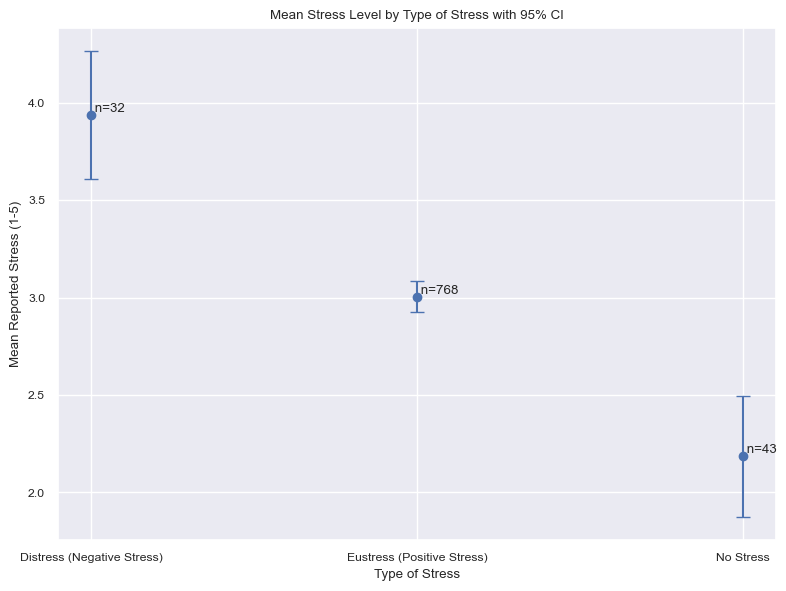

In [12]:
# Mean plot for ANOVA test (alternative to boxplot)

means, cis, ns = [], [], []

for g in order:
    x = stress_data.loc[stress_data[stress_type] == g, stress_amount].dropna().values
    n = len(x)
    m = np.mean(x)
    s = np.std(x, ddof=1)
    se = s / np.sqrt(n)
    tcrit = stats.t.ppf(0.975, df=n-1)  # 95% CI
    ci = tcrit * se
    means.append(m); cis.append(ci); ns.append(n)

xpos = np.arange(len(order))

plt.figure(figsize=(8,6))
plt.errorbar(x=xpos, y=means, yerr=cis, fmt='o', capsize=5)
plt.xticks(xpos, order)
plt.title('Mean Stress Level by Type of Stress with 95% CI')
plt.xlabel('Type of Stress')
plt.ylabel('Mean Reported Stress (1-5)')
for i, n in enumerate(ns):
    plt.text(xpos[i], means[i], f" n={n}", ha='left', va='bottom')
plt.tight_layout()
plt.show()


---

## Presentation
Prepare a **written report or slide deck** with the following sections:

1. **Introduction**  
   - Introduce the dataset and explain its relevance.  

2. **Data Analysis**  
   - Present findings from analysis, cross-tabulation, and tests.  

3. **Visualizations**  
   - Display visualizations and explain their significance.  

4. **Interpretation and Analysis**  
   - Provide a detailed interpretation of results and implications.  

5. **Conclusion**  
   - Summarize findings and their contribution to dataset understanding.  

---

## Citation and References
- Cite the dataset source and any external materials.  
- Use **APA style** for all references.  